In [1]:
import pandas as pd  
import numpy as np   

import matplotlib.pyplot as plt  
import seaborn as sns  

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
location = r"D:\AI-DATASETS\01-MISC\kc_house_data.csv"

In [6]:
df = pd.read_csv(location)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# check for missing values
df.isnull().values.any()

False

In [9]:
df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","yr_built","sqft_living15","sqft_lot15"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1788.390691,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,828.090978,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,290.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1190.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2210.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,2015.000000,6210.000000,871200.000000


Descriptions and names of the columns (features) are given below.

- id
- date: Date house was sold
- price: Price of the sold house
- bedrooms: Number of Bedrooms
- bathrooms: Number of bathrooms
- sqft_living: Square footage of the living space
- sqrt_lot: Square footage of the lot
- floors: Total floors in the house
- waterfront: Whether the house is on a waterfront(1: yes, 0: no)
- view: special view?
- condition: Condition of the house
- grade: unknown
- sqft_above: Square footage of house apart from basement
- sqft_basement: Square footage of the basement
- yr_built: Built year
- yr_renovated: Year when the house was renovated
- zipcode: zipcode of the house
- lat: Latitude coordinate
- long Longitude coordinate
- sqft_living15: Living room area in 2015(implies some renovations)
- sqrt_lot15: Lot area in 2015(implies some renovations)

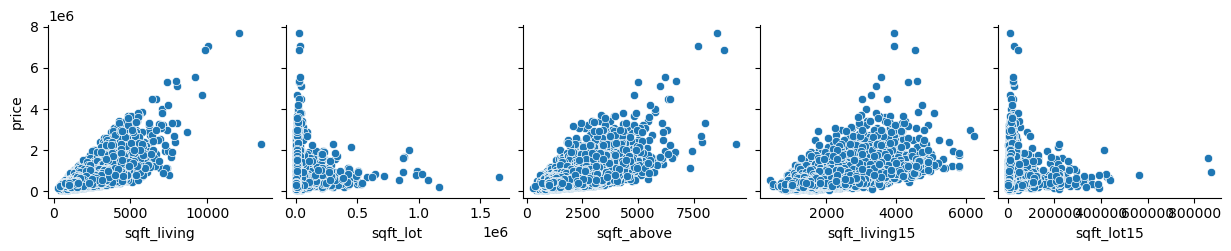

In [10]:
sns.pairplot(data=df, 
             x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], 
             y_vars=["price"]);

"lot" size is not well correlated to price but the data for living space is reasonable. Visually the best feature to use looks like sqft_living 

In [11]:
df2 = df[["price", "sqft_living"]]
df2.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [12]:
X = df2[['sqft_living']].values
y = df2.price.values

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

names = "sqft_living"

# fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# fig.suptitle('Feature Scale Comparison')

# ax0.boxplot(X, showmeans=True)

scaler    = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# ax1.boxplot(rescaledX, showmeans=True)
# ax1.set_xticklabels(names, fontsize=8.5)
# ax1.set_title('using min-max scaler')

scaler        = StandardScaler().fit(X)
standardizedX = scaler.transform(X)
# ax2.boxplot(standardizedX, showmeans=True)
# ax2.set_xticklabels(names, fontsize=8.5)
# ax2.set_title('standard scaler');

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linreg = LinearRegression()

In [16]:
linreg.fit(standardizedX, y)

LinearRegression()

In [17]:
linreg.intercept_, linreg.coef_

(540088.1417665293, array([257730.19883695]))

## Visualize the Cost Function

#### the SSE equation is
$ SSE(\beta_0, \beta_1) = \sum_{i=1}^{n}(y_i - \beta_0 - \beta_j{x_i})^2$ 

SSE is a sum of squares, a second order polynomial equation. That means that it is parabolic.If we set \beta_0=0 (or some other constant value) and just look at SSE as a function of \beta_1 then it is a simple parabola with an obvious minimum.

In [18]:
# The function SSE
def SSE(w0, w1, x, y, m):
    SSE = 0
    
    for i in range(m):
        SSE += ((w0 + w1*x[i]) - y[i] )**2
        
    return SSE

The dimension variables are a0, a1 and SSE(a0,a1). 

2 ways to make 3-d plots are 
- surface, 
- contour plots.

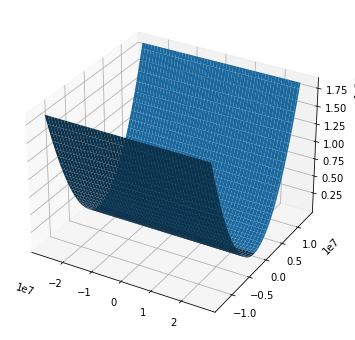

In [16]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

w0 = np.linspace(-linreg.intercept_*50, linreg.intercept_*50, 100)
w1 = np.linspace(-linreg.coef_*50,      linreg.coef_*50,      100)

aa0, aa1 = np.meshgrid(w0, w1)

ax.figure.set_size_inches(12, 6)

ax.plot_surface(aa0, aa1, SSE(aa0, aa1, X, y, m=len(X)));

In [ ]:
a0 = np.linspace(-linreg.intercept_*50, linreg.intercept_*50, 500)
a1 = np.linspace(-linreg.coef_*50,      linreg.coef_*50, 500)

aa0, aa1 = np.meshgrid(a0, a1)

plt.figure(figsize=(10, 6))

levels = np.sort(SSE(aa0, aa1, X, y, m=len(X)))

plt.contour(aa0, 
            aa1, 
            SSE(aa0, aa1, X, y, m=len(X)) , 
            colors='C0'
            );

#### Contour plots

1. The center of that that smallest ring is where the minimum of SSE is.